11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/30
469/469 - 19s - loss: 0.2029 - accuracy: 0.9375 - val_loss: 0.0489 - val_accuracy: 0.9832 - 19s/epoch - 40ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0345 - val_accuracy: 0.9890 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0348 - val_accuracy: 0.9885 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0324 - val_accuracy: 0.9895 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0346 - val_accuracy: 0.9889 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0261 - val_accuracy: 0.9910 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0264 - val_accuracy: 0.9909 - 2s/epoch - 5ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0321 -

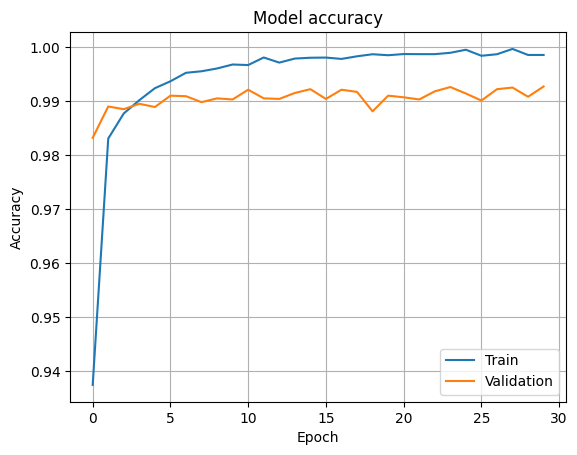

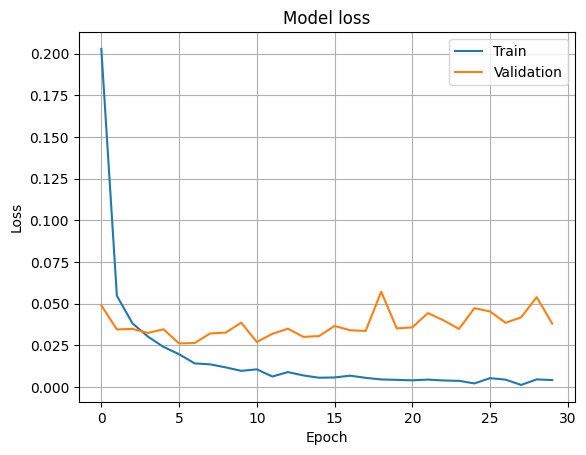

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/12
469/469 - 6s - loss: 0.2513 - accuracy: 0.9237 - val_loss: 0.0484 - val_accuracy: 0.9842 - 6s/epoch - 14ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.0398 - val_accuracy: 0.9867 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.0342 - val_accuracy: 0.9895 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 5s - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0359 - val_accuracy: 0.9885 - 5s/epoch - 12ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0266 - val_accuracy: 0.9914 - 4s/epoch - 9ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0288 - val_accuracy: 0.9918 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0298 - val_accuracy: 0.9912 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0274 - val_accuracy: 0.9916 - 4s/epoch - 8ms/step
Epoch 9/12
469/469 - 4

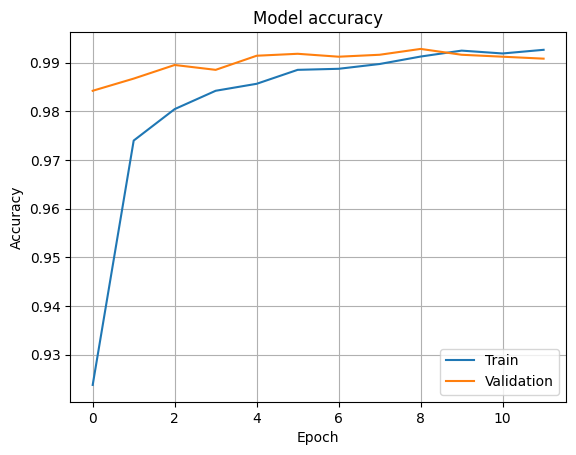

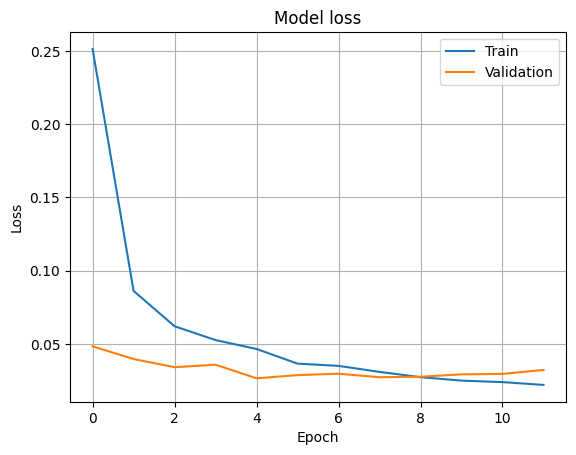

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

170498071/170498071 [==============================] - 14s 0us/step
Epoch 1/30
391/391 - 8s - loss: 1.6342 - accuracy: 0.4000 - val_loss: 1.3340 - val_accuracy: 0.5223 - 8s/epoch - 19ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2445 - accuracy: 0.5568 - val_loss: 1.0699 - val_accuracy: 0.6166 - 4s/epoch - 10ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0906 - accuracy: 0.6112 - val_loss: 0.9485 - val_accuracy: 0.6636 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9812 - accuracy: 0.6546 - val_loss: 0.8611 - val_accuracy: 0.6973 - 4s/epoch - 11ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9179 - accuracy: 0.6749 - val_loss: 0.8299 - val_accuracy: 0.7072 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8500 - accuracy: 0.7003 - val_loss: 0.7908 - val_accuracy: 0.7240 - 4s/epoch - 10ms/step
Epoch 7/30
391/391 - 4s - loss: 0.7971 - accuracy: 0.7189 - val_loss: 0.7438 - val_accuracy: 0.7400 - 4s/epoch - 11ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7583 - accuracy: 0.7343 - val_loss: 0

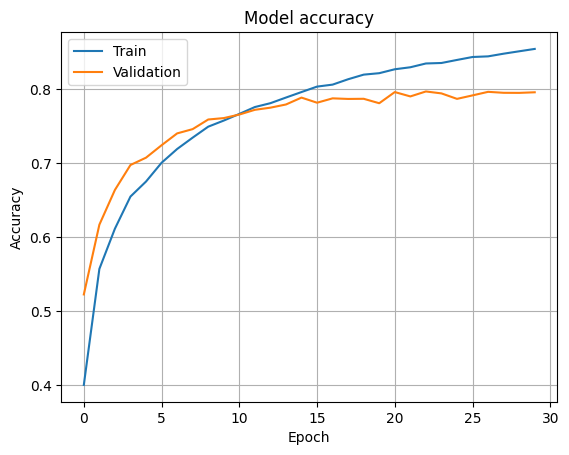

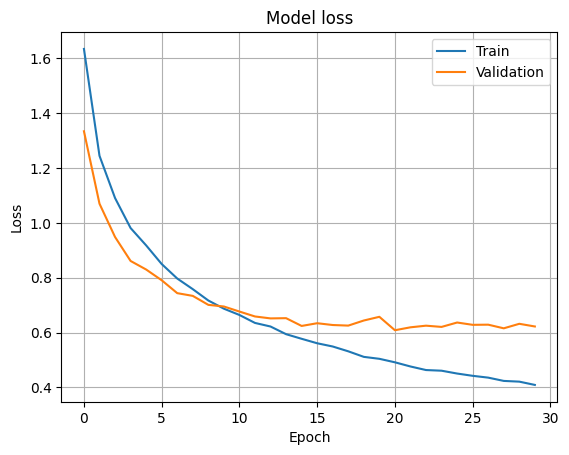

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cnn.save('/content/drive/MyDrive/CodeData/GitHub_Examples/TensorFlow_CNN.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn=tf.keras.models.load_model("/content/drive/MyDrive/CodeData/GitHub_Examples/TensorFlow_CNN.h5")
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

Epoch 1/30
391/391 - 8s - loss: 1.6415 - accuracy: 0.3922 - val_loss: 1.3006 - val_accuracy: 0.5296 - 8s/epoch - 19ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2645 - accuracy: 0.5484 - val_loss: 1.0961 - val_accuracy: 0.6116 - 4s/epoch - 11ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0971 - accuracy: 0.6120 - val_loss: 0.9559 - val_accuracy: 0.6648 - 4s/epoch - 11ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9883 - accuracy: 0.6524 - val_loss: 0.9094 - val_accuracy: 0.6797 - 4s/epoch - 11ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9058 - accuracy: 0.6794 - val_loss: 0.8215 - val_accuracy: 0.7147 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8487 - accuracy: 0.7005 - val_loss: 0.7737 - val_accuracy: 0.7261 - 4s/epoch - 10ms/step
Epoch 7/30
391/391 - 4s - loss: 0.7998 - accuracy: 0.7191 - val_loss: 0.7487 - val_accuracy: 0.7363 - 4s/epoch - 10ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7603 - accuracy: 0.7334 - val_loss: 0.7140 - val_accuracy: 0.7510 - 4s/epoch - 10ms/step
Epoch 9/30
391/3

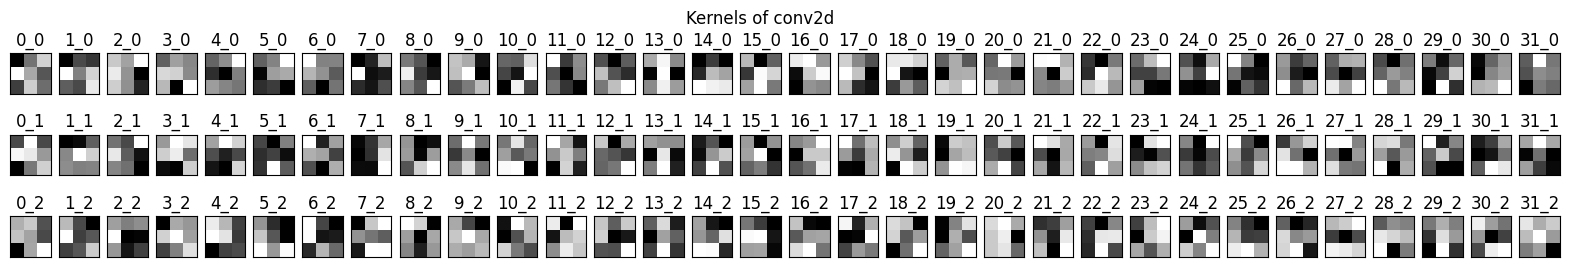

특징 맵의 텐서 모양을 출력
conv2d_4 (None, 30, 30, 32)
conv2d_5 (None, 28, 28, 32)
conv2d_6 (None, 12, 12, 64)
conv2d_7 (None, 10, 10, 64)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step
1번 영상을 출력
컨볼루션층의 특징 맵을 시각화


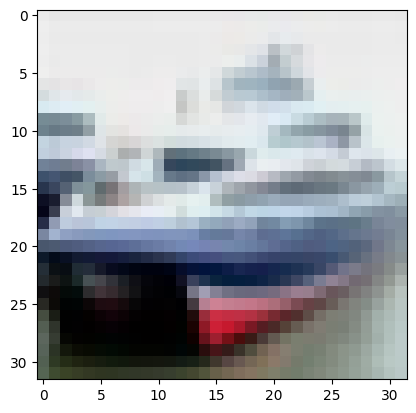

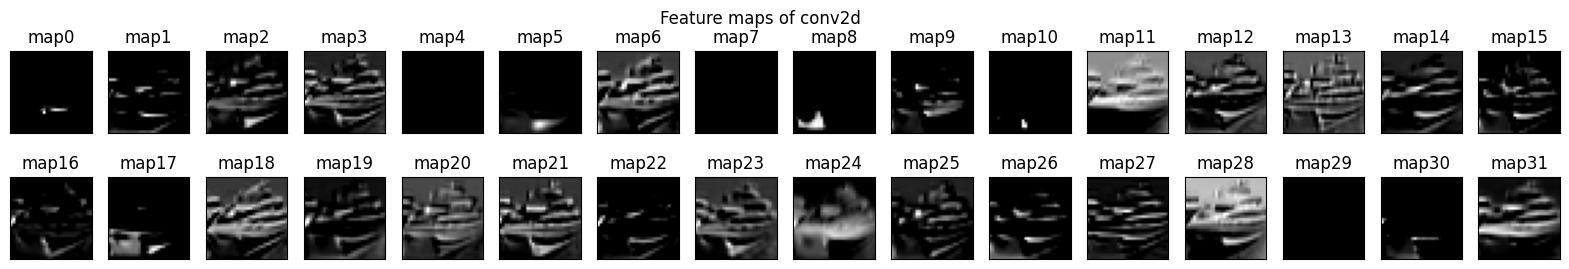

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

print('# cnn 모델의 정보 출력')
cnn.summary() # cnn 모델의 정보 출력

print('커널의 텐서 모양을 출력')
for layer in cnn.layers:
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

print('컨볼루션층의 커널을 시각화')
plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show() # 컨볼루션층의 커널을 시각화

print('특징 맵의 텐서 모양을 출력')
for layer in cnn.layers: 
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

print('1번 영상을 출력')
plt.imshow(x_test[1]) # 1번 영상을 출력

print('컨볼루션층의 특징 맵을 시각화')
plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show() # 컨볼루션층의 특징 맵을 시각화

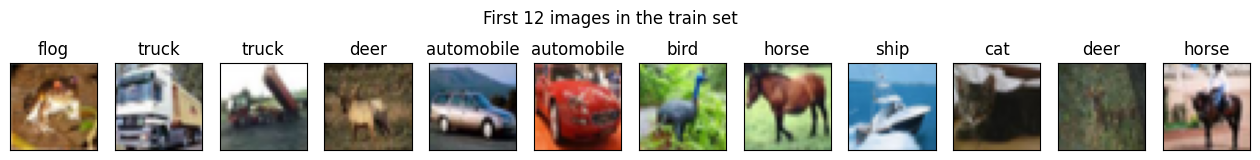

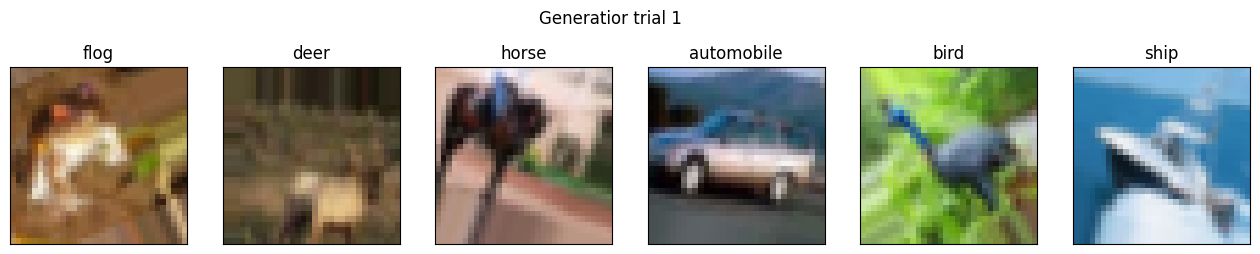

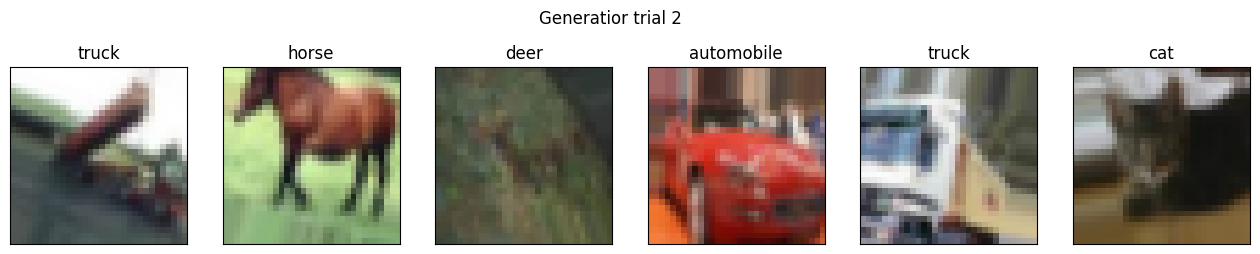

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# CIFAR-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:12,]; y_train=y_train[0:12,] # 앞 12개에 대해서만 증대 적용

# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])

# 영상 증대기 생성
batch_siz=6 # 한 번에 생성하는 양
generator=ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

# 첫 번째 증대하고 그리기
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_siz):
    plt.subplot(1,batch_siz,i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])

# 두 번째 증대하고 그리기
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")
for i in range(batch_siz):
    plt.subplot(1,batch_siz,i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])

Epoch 1/50


<ipython-input-8-fd5d338bbe36>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)


391/391 - 29s - loss: 1.7437 - accuracy: 0.3534 - val_loss: 1.3929 - val_accuracy: 0.4926 - 29s/epoch - 73ms/step
Epoch 2/50
391/391 - 25s - loss: 1.3849 - accuracy: 0.5010 - val_loss: 1.1729 - val_accuracy: 0.5866 - 25s/epoch - 64ms/step
Epoch 3/50
391/391 - 26s - loss: 1.2508 - accuracy: 0.5512 - val_loss: 1.0845 - val_accuracy: 0.6168 - 26s/epoch - 67ms/step
Epoch 4/50
391/391 - 25s - loss: 1.1443 - accuracy: 0.5938 - val_loss: 1.0281 - val_accuracy: 0.6382 - 25s/epoch - 64ms/step
Epoch 5/50
391/391 - 25s - loss: 1.0693 - accuracy: 0.6196 - val_loss: 0.9679 - val_accuracy: 0.6612 - 25s/epoch - 65ms/step
Epoch 6/50
391/391 - 25s - loss: 1.0256 - accuracy: 0.6364 - val_loss: 0.8800 - val_accuracy: 0.6899 - 25s/epoch - 64ms/step
Epoch 7/50
391/391 - 25s - loss: 0.9765 - accuracy: 0.6544 - val_loss: 0.8446 - val_accuracy: 0.7095 - 25s/epoch - 65ms/step
Epoch 8/50
391/391 - 25s - loss: 0.9442 - accuracy: 0.6650 - val_loss: 0.8141 - val_accuracy: 0.7223 - 25s/epoch - 64ms/step
Epoch 9/50


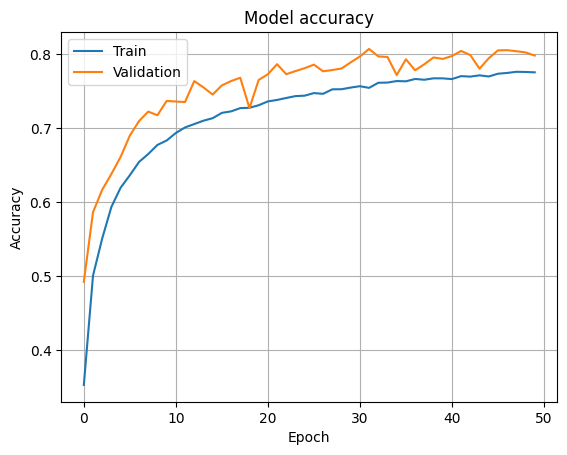

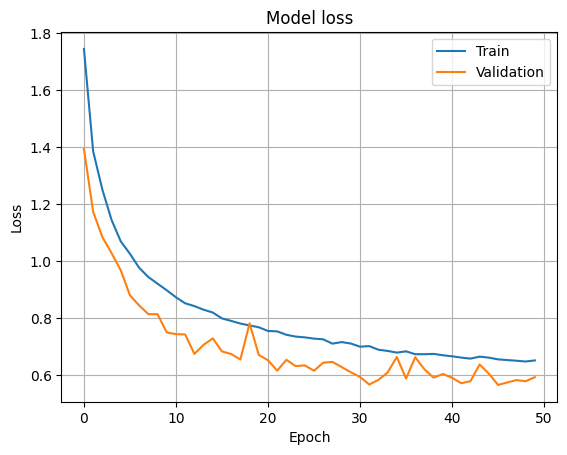

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

170498071/170498071 [==============================] - 14s 0us/step
드롭아웃 적용 안 할 때: 0.727240014076233
드롭아웃 적용할 때: 0.7474799990653992


{'whiskers': [<matplotlib.lines.Line2D at 0x7fabbd6db5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fabbd672700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fabbd6f8ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fabbd672c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fabbd672ee0>,
 'means': []}

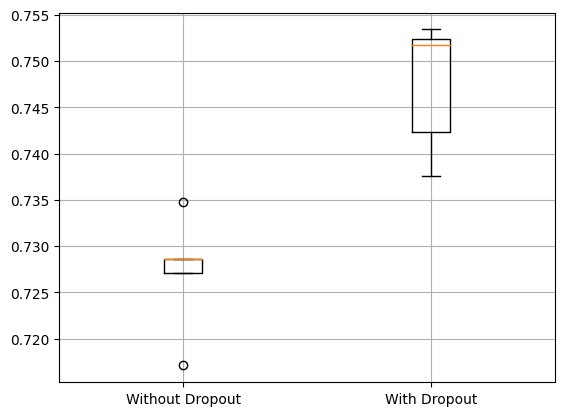

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
313/313 - 16s - loss: 1.5730 - accuracy: 0.4279 - val_loss: 1.2649 - val_accuracy: 0.5537 - 16s/epoch - 50ms/step
Epoch 2/10
313/313 - 3s - loss: 1.1523 - accuracy: 0.5938 - val_loss: 1.1368 - val_accuracy: 0.5976 - 3s/epoch - 8ms/step
Epoch 3/10
313/313 - 3s - loss: 0.9527 - accuracy: 0.6680 - val_loss: 0.9264 - val_accuracy: 0.6734 - 3s/epoch - 8ms/step
Epoch 4/10
313/313 - 3s - loss: 0.8012 - accuracy: 0.7189 - val_loss: 0.8650 - val_accuracy: 0.6979 - 3s/epoch - 8ms/step
Epoch 5/10
313/313 - 3s - loss: 0.6989 - accuracy: 0.7579 - val_loss: 0.8285 - val_accuracy: 0.7119 - 3s/epoch - 9ms/step
Epoch 6/10
313/313 - 3s - loss: 0.6035 - accuracy: 0.7901 - val_loss: 0.8223 - val_accuracy: 0.7165 - 3s/epoch - 9ms/step
Epoch 7/10
313/313 - 3s - loss: 0.5129 - accuracy: 0.8226 - val_loss: 0.8635 - val_accuracy: 0.7223 - 3s/epoch - 8ms/step
Epoch 8/10
313/313 - 3s - loss: 0.4201 - accuracy: 0.8525 - val_loss: 0.8663

<ipython-input-1-e6c74df4fc73>:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)


391/391 - 27s - loss: 1.6110 - accuracy: 0.4082 - val_loss: 1.3004 - val_accuracy: 0.5292 - 27s/epoch - 68ms/step
Epoch 2/10
391/391 - 24s - loss: 1.2491 - accuracy: 0.5509 - val_loss: 1.0748 - val_accuracy: 0.6239 - 24s/epoch - 61ms/step
Epoch 3/10
391/391 - 25s - loss: 1.0848 - accuracy: 0.6152 - val_loss: 1.0099 - val_accuracy: 0.6437 - 25s/epoch - 63ms/step
Epoch 4/10
391/391 - 24s - loss: 0.9907 - accuracy: 0.6472 - val_loss: 0.9326 - val_accuracy: 0.6704 - 24s/epoch - 63ms/step
Epoch 5/10
391/391 - 24s - loss: 0.9025 - accuracy: 0.6834 - val_loss: 0.8100 - val_accuracy: 0.7136 - 24s/epoch - 61ms/step
Epoch 6/10
391/391 - 24s - loss: 0.8292 - accuracy: 0.7077 - val_loss: 0.7909 - val_accuracy: 0.7288 - 24s/epoch - 63ms/step
Epoch 7/10
391/391 - 24s - loss: 0.7827 - accuracy: 0.7272 - val_loss: 0.7733 - val_accuracy: 0.7377 - 24s/epoch - 62ms/step
Epoch 8/10
391/391 - 25s - loss: 0.7387 - accuracy: 0.7399 - val_loss: 0.7067 - val_accuracy: 0.7567 - 25s/epoch - 63ms/step
Epoch 9/10


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6dd88186d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6dd8818310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6d0052ebe0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6dd7648280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6dd7648640>,
 'means': []}

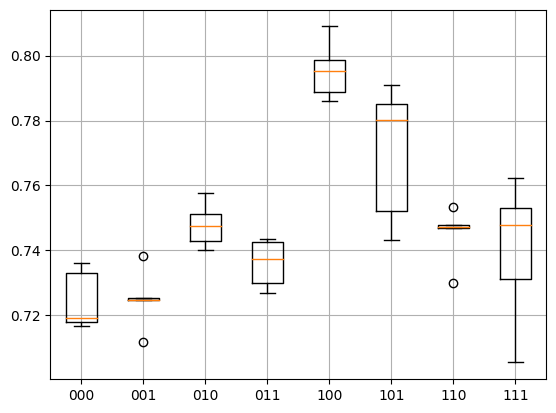

In [ ]:
# 수행시간이 오래 걸림
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=10
k=5 # k-folds

# 하이퍼 매개변수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        # 신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
            cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
        else:
            cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch, validation_data=(x_test,y_test),verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 하이퍼 매개변수를 달리 하며 신경망 모델을 평가
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (",acc_000,"/",np.array(acc_000).mean(),")")
print("[001] (",acc_001,"/",np.array(acc_001).mean(),")")
print("[010] (",acc_010,"/",np.array(acc_010).mean(),")")
print("[011] (",acc_011,"/",np.array(acc_011).mean(),")")
print("[100] (",acc_100,"/",np.array(acc_100).mean(),")")
print("[101] (",acc_101,"/",np.array(acc_101).mean(),")")
print("[110] (",acc_110,"/",np.array(acc_110).mean(),")")
print("[111] (",acc_111,"/",np.array(acc_111).mean(),")")

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
import os

train_folder='/content/drive/MyDrive/CodeData/Data_TextBook/PythonAI/ch6/CUB200/train'
test_folder='/content/drive/MyDrive/CodeData/Data_TextBook/PythonAI/ch6/CUB200/test'

class_reduce=0.1 # 부류 수 줄여서 데이터양 줄임(속도와 메모리 효율을 위해)
no_class=int(len(os.listdir(train_folder))*class_reduce) # 부류 개수

x_train,y_train=[],[]
for i,class_name in enumerate(os.listdir(train_folder)):
    if i<no_class: # 13~14행이 지정한 부류만 사용
        for fname in os.listdir(train_folder+'/'+class_name):
            img=image.load_img(train_folder+'/'+class_name+'/'+fname,target_size=(224,224))
            if len(img.getbands())!=3:
                print("주의: 유효하지 않은 영상 발생",class_name,fname)
                continue
            x=image.img_to_array(img)
            x=preprocess_input(x)
            x_train.append(x)
            y_train.append(i)

x_test,y_test=[],[]
for i,class_name in enumerate(os.listdir(test_folder)):
    if i<no_class: # 13~14행이 지정한 부류만 사용
        for fname in os.listdir(test_folder+'/'+class_name):
            img=image.load_img(test_folder+'/'+class_name+'/'+fname,target_size=(224,224))
            if len(img.getbands())!=3:
                print("주의: 유효하지 않은 영상 발생",class_name,fname)
                continue
            x=image.img_to_array(img)
            x=preprocess_input(x)
            x_test.append(x)
            y_test.append(i)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_train=tf.keras.utils.to_categorical(y_train,no_class)
y_test=tf.keras.utils.to_categorical(y_test,no_class)

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(no_class,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(0.00002),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test),verbose=1)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/10
38/38 [==============================] - 63s 345ms/step - loss: 2.6663 - accuracy: 0.3567 - val_loss: 6.6007 - val_accuracy: 0.1320
Epoch 2/10
38/38 [==============================] - 8s 221ms/step - loss: 0.0609 - accuracy: 0.9783 - val_loss: 7.3148 - val_accuracy: 0.1437
Epoch 3/10
38/38 [==============================] - 9s 248ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 7.4545 - val_accuracy: 0.1320
Epoch 4/10
38/38 [==============================] - 8s 224ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.3858 - val_accuracy: 0.1301
Epoch 5/10
38/38 [==============================] - 8s 222ms/step - loss: 9.5018e-04 - accuracy: 1.0000 - val_loss: 7.3345 - val_accuracy: 0.1320
Epoch 6/10
38/38 [==============================] - 9s 250ms/step - loss: 7.5773e-04 - accuracy: 1.0000 - val_loss: 7.2997 - val_accuracy: 0.1320
Epoch 7/10
38/38 [==============================] - 9s 227ms/step - loss: 